# **Análise Socioeconômica do estado de Minas Gerais**

Esse projeto tem por objetivo utilizar algoritmos de redes neurais artificiais para realizar uma análise socioeconômica do estado de Minas Gerais utilizando as respostas dos questionários dos inscritos no Enem de 2019.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
dados = pd.read_csv(r'C:\Users\Optimus\GitHUB\cursos_udemy\py3_rna\planilhas\socioeconomico_mg_enem.csv', sep=';', encoding='iso-8859-1')

# **Tratamento e Análise Exploratória dos Dados**

## **Limpeza dos dados**

In [5]:
dados.head(8)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,TP_SEXO,Q001,Q002,Q003,Q004,Q005,Q006,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,"1,90001E+11",Uberlândia,MG,M,E,F,B,D,3,I,...,B,A,A,D,A,A,D,B,B,B
1,"1,90001E+11",Canaã,MG,M,B,B,A,A,5,D,...,A,A,A,B,A,A,C,A,A,A
2,"1,90001E+11",Araxá,MG,M,C,C,B,B,3,F,...,A,A,A,C,B,A,C,A,A,B
3,"1,90001E+11",Belo Horizonte,MG,M,G,D,D,D,3,P,...,B,A,B,B,A,A,D,A,D,B
4,"1,90001E+11",São João da Ponte,MG,M,B,D,B,B,3,D,...,A,A,A,B,B,A,C,A,B,A
5,"1,90001E+11",Espinosa,MG,M,C,G,C,D,5,I,...,B,A,A,C,B,A,E,A,B,B
6,"1,90001E+11",Três Corações,MG,F,E,E,C,B,3,C,...,B,A,A,B,B,B,E,A,B,B
7,"1,90001E+11",Betim,MG,M,H,D,C,F,3,F,...,B,A,A,B,A,A,D,A,B,B


In [6]:
dados.shape

(538896, 29)

In [7]:
dados1 = dados.drop(columns=['SG_UF_RESIDENCIA'])

In [8]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,"1,90001E+11",Uberlândia,M,E,F,B,D,3,I,A,...,B,A,A,D,A,A,D,B,B,B
1,"1,90001E+11",Canaã,M,B,B,A,A,5,D,A,...,A,A,A,B,A,A,C,A,A,A
2,"1,90001E+11",Araxá,M,C,C,B,B,3,F,A,...,A,A,A,C,B,A,C,A,A,B
3,"1,90001E+11",Belo Horizonte,M,G,D,D,D,3,P,B,...,B,A,B,B,A,A,D,A,D,B
4,"1,90001E+11",São João da Ponte,M,B,D,B,B,3,D,A,...,A,A,A,B,B,A,C,A,B,A


In [9]:
dados1 = dados1.drop(columns=['Q001','Q002','Q003','Q004','Q013','Q018','Q020'],)

In [10]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,...,Q014,Q015,Q016,Q017,Q019,Q021,Q022,Q023,Q024,Q025
0,"1,90001E+11",Uberlândia,M,3,I,A,C,D,B,A,...,B,A,B,A,D,A,D,B,B,B
1,"1,90001E+11",Canaã,M,5,D,A,B,C,A,B,...,A,A,A,A,B,A,C,A,A,A
2,"1,90001E+11",Araxá,M,3,F,A,B,D,A,A,...,B,B,A,A,C,A,C,A,A,B
3,"1,90001E+11",Belo Horizonte,M,3,P,B,D,D,C,A,...,B,A,B,A,B,A,D,A,D,B
4,"1,90001E+11",São João da Ponte,M,3,D,A,B,D,B,B,...,A,A,A,A,B,A,C,A,B,A


In [11]:
dados1.isnull().sum()

NU_INSCRICAO               0
NO_MUNICIPIO_RESIDENCIA    0
TP_SEXO                    0
Q005                       0
Q006                       0
Q007                       0
Q008                       0
Q009                       0
Q010                       0
Q011                       0
Q012                       0
Q014                       0
Q015                       0
Q016                       0
Q017                       0
Q019                       0
Q021                       0
Q022                       0
Q023                       0
Q024                       0
Q025                       0
dtype: int64

## **Análise quantitativa dos atributos**

In [12]:
dados1['TP_SEXO'].value_counts()

F    326374
M    212522
Name: TP_SEXO, dtype: int64

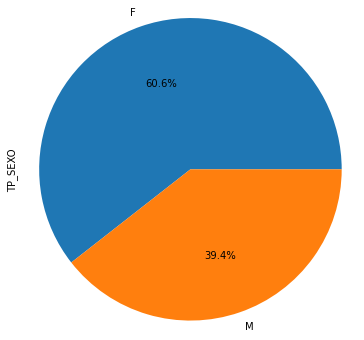

In [13]:
dados1.TP_SEXO.value_counts().plot(figsize=(6,6),kind='pie', autopct='%.1f%%')
plt.axis('equal');

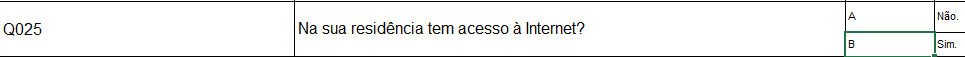

In [14]:
dados1['Q025'].value_counts()

B    454439
A     84457
Name: Q025, dtype: int64

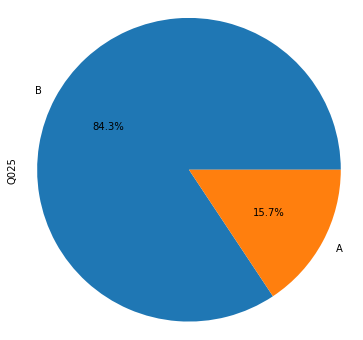

In [15]:
dados1.Q025.value_counts().plot(figsize=(6,6),kind='pie', autopct='%.1f%%')
plt.axis('equal');

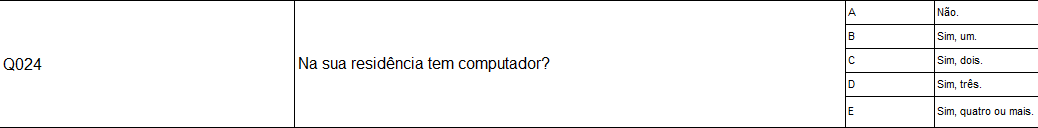

In [16]:
dados1['Q024'].value_counts()


B    284913
A    186145
C     48640
D     13602
E      5596
Name: Q024, dtype: int64

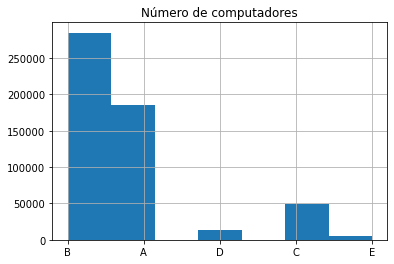

In [17]:
dados1.Q024.hist(bins=7)
plt.title('Número de computadores')
plt.show()

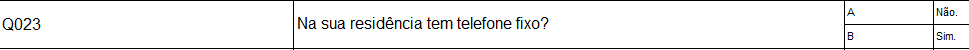

In [18]:
dados1['Q023'].value_counts()

A    389688
B    149208
Name: Q023, dtype: int64

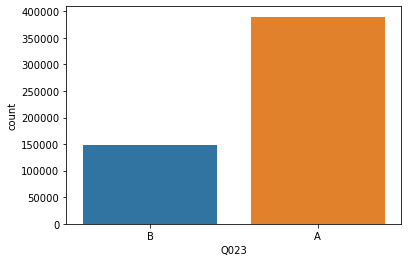

In [19]:
sns.countplot(dados1['Q023']);

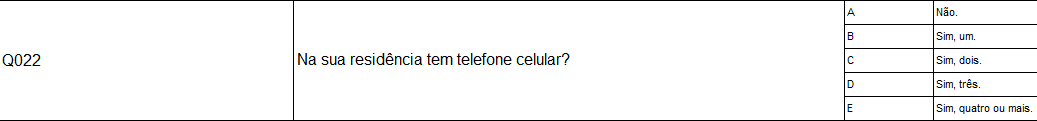

In [20]:
dados1['Q022'].value_counts()

D    167238
C    162676
E    117737
B     84284
A      6961
Name: Q022, dtype: int64

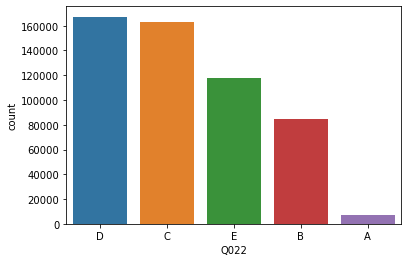

In [21]:
sns.countplot(dados1['Q022']);

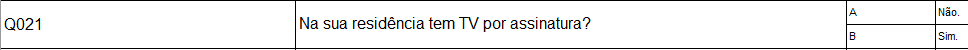

In [22]:
dados1['Q021'].value_counts()

A    406532
B    132364
Name: Q021, dtype: int64

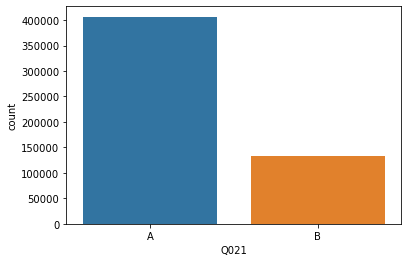

In [23]:
sns.countplot(dados1['Q021']);

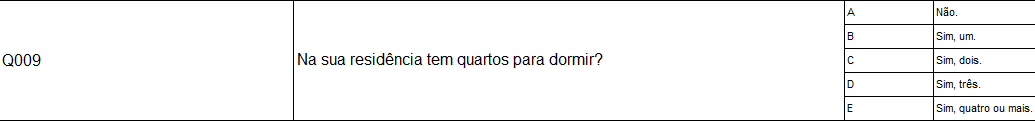

In [24]:
dados1['Q009'].value_counts()

C    237301
D    224848
B     38168
E     37425
A      1154
Name: Q009, dtype: int64

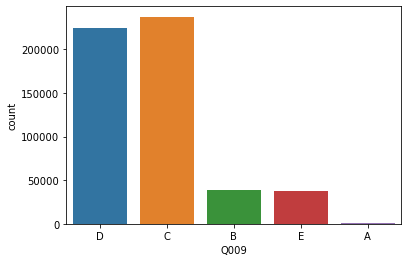

In [25]:
sns.countplot(dados1['Q009']);

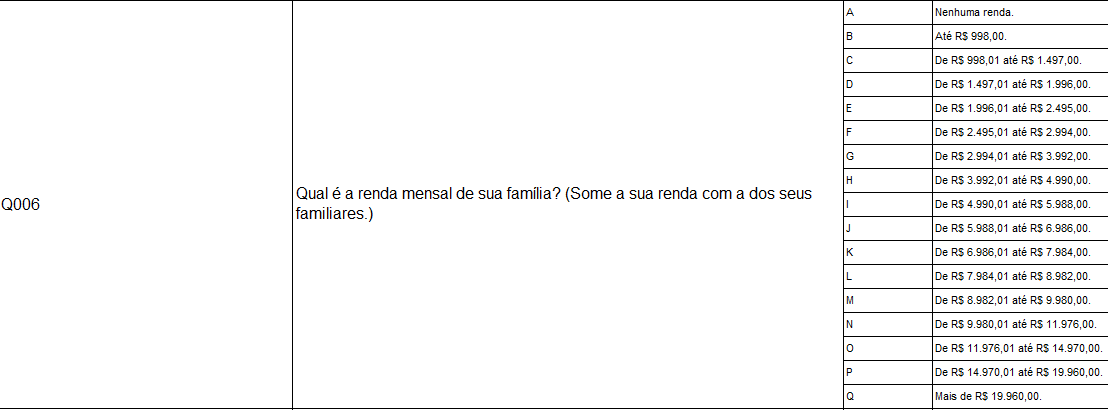

In [26]:
dados1['Q006'].value_counts()

C    142297
B     97839
D     63327
E     61486
G     39732
F     29265
H     24125
I     17697
A     12755
J      9561
N      7192
K      6997
O      5798
Q      5698
L      5295
M      5157
P      4675
Name: Q006, dtype: int64

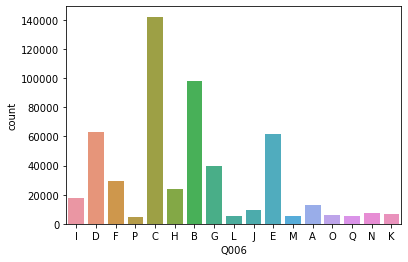

In [27]:
sns.countplot(dados1['Q006']);

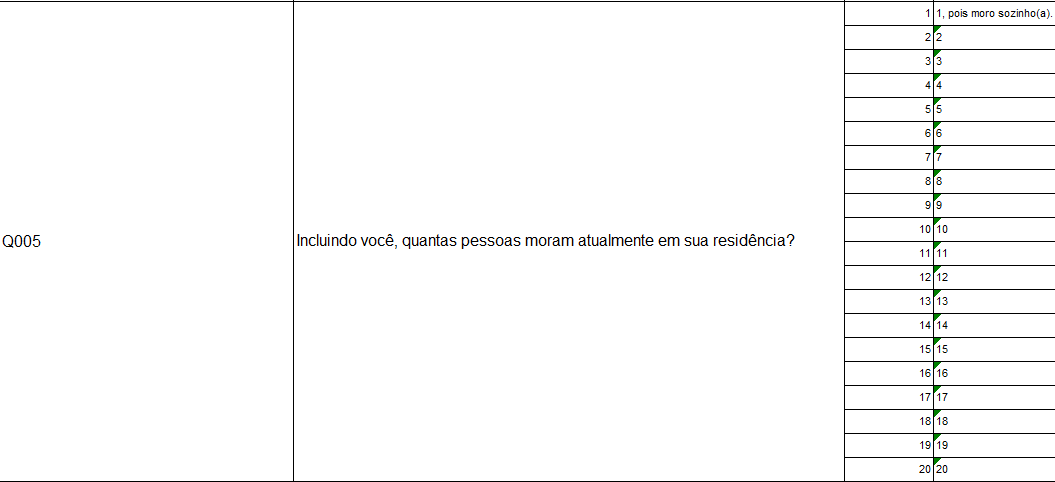

In [28]:
dados1['Q005'].value_counts()

4     183790
3     143724
5      83280
2      69479
6      26309
1      16201
7       9598
8       3703
9       1367
10       745
11       264
12       175
13        86
14        47
15        41
20        37
16        20
19        14
17         8
18         8
Name: Q005, dtype: int64

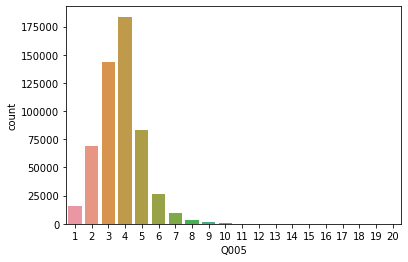

In [29]:
sns.countplot(dados1['Q005']);

In [30]:
dados1.dtypes

NU_INSCRICAO               object
NO_MUNICIPIO_RESIDENCIA    object
TP_SEXO                    object
Q005                        int64
Q006                       object
Q007                       object
Q008                       object
Q009                       object
Q010                       object
Q011                       object
Q012                       object
Q014                       object
Q015                       object
Q016                       object
Q017                       object
Q019                       object
Q021                       object
Q022                       object
Q023                       object
Q024                       object
Q025                       object
dtype: object

In [31]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,...,Q014,Q015,Q016,Q017,Q019,Q021,Q022,Q023,Q024,Q025
0,"1,90001E+11",Uberlândia,M,3,I,A,C,D,B,A,...,B,A,B,A,D,A,D,B,B,B
1,"1,90001E+11",Canaã,M,5,D,A,B,C,A,B,...,A,A,A,A,B,A,C,A,A,A
2,"1,90001E+11",Araxá,M,3,F,A,B,D,A,A,...,B,B,A,A,C,A,C,A,A,B
3,"1,90001E+11",Belo Horizonte,M,3,P,B,D,D,C,A,...,B,A,B,A,B,A,D,A,D,B
4,"1,90001E+11",São João da Ponte,M,3,D,A,B,D,B,B,...,A,A,A,A,B,A,C,A,B,A


In [32]:
dados2 = dados1.drop(columns=['NU_INSCRICAO','NO_MUNICIPIO_RESIDENCIA','TP_SEXO'],)

In [33]:
dados2.head()

,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q014,Q015,Q016,Q017,Q019,Q021,Q022,Q023,Q024,Q025
0,3,I,A,C,D,B,A,B,B,A,B,A,D,A,D,B,B,B
1,5,D,A,B,C,A,B,B,A,A,A,A,B,A,C,A,A,A
2,3,F,A,B,D,A,A,B,B,B,A,A,C,A,C,A,A,B
3,3,P,B,D,D,C,A,B,B,A,B,A,B,A,D,A,D,B
4,3,D,A,B,D,B,B,B,A,A,A,A,B,A,C,A,B,A


In [34]:
dados1.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,TP_SEXO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,...,Q014,Q015,Q016,Q017,Q019,Q021,Q022,Q023,Q024,Q025
0,"1,90001E+11",Uberlândia,M,3,I,A,C,D,B,A,...,B,A,B,A,D,A,D,B,B,B
1,"1,90001E+11",Canaã,M,5,D,A,B,C,A,B,...,A,A,A,A,B,A,C,A,A,A
2,"1,90001E+11",Araxá,M,3,F,A,B,D,A,A,...,B,B,A,A,C,A,C,A,A,B
3,"1,90001E+11",Belo Horizonte,M,3,P,B,D,D,C,A,...,B,A,B,A,B,A,D,A,D,B
4,"1,90001E+11",São João da Ponte,M,3,D,A,B,D,B,B,...,A,A,A,A,B,A,C,A,B,A


In [35]:
dados2.to_csv(r'C:\Users\Optimus\GitHUB\cursos_udemy\py3_rna\planilhas\dados_tratados.csv', encoding = 'iso-8859-1', index = False)